In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-video-games/steam-200k.csv


# Step-1: Data Loading and cleaning

## Data Loading

In [2]:
df = pd.read_csv('/kaggle/input/steam-video-games/steam-200k.csv',usecols=[0,1,2,3],names=['userid','game','behavior','hoursplayed'])
df.head()

,userid,game,behavior,hoursplayed
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


# Check null values

In [3]:
df.isnull().sum()

userid         0
game           0
behavior       0
hoursplayed    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userid       200000 non-null  int64  
 1   game         200000 non-null  object 
 2   behavior     200000 non-null  object 
 3   hoursplayed  200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [5]:
print(df['hoursplayed'].describe())
print(df['hoursplayed'].isnull().sum())  # Check for NaN
print((df['hoursplayed'] == float('inf')).sum())  # Check for infinite values


count    200000.000000
mean         17.874384
std         138.056952
min           0.100000
25%           1.000000
50%           1.000000
75%           1.300000
max       11754.000000
Name: hoursplayed, dtype: float64
0
0


### Convert Userid to string

In [6]:
df.userid = df.userid.astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userid       200000 non-null  object 
 1   game         200000 non-null  object 
 2   behavior     200000 non-null  object 
 3   hoursplayed  200000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [8]:
type(df.userid[0])

str

# Step-2: EDA

In [9]:
print(f"Number of users: { len(df.userid.unique())}")
print(f"Number of games: { len(df.game.unique())}")

Number of users: 12393
Number of games: 5155


The total number of users in database are 12,393 with 5,155 games

## Top 10 Games with respect to number of gamers

In [10]:
 gamer_count = df.groupby(['game'])[['userid']].nunique().sort_values(by='userid',ascending=False).head(10)
gamer_count

,userid
game,
Dota 2,4841
Team Fortress 2,2323
Unturned,1563
Counter-Strike Global Offensive,1412
Half-Life 2 Lost Coast,981
Counter-Strike Source,978
Left 4 Dead 2,951
Counter-Strike,856
Warframe,847


[Text(0, 0, '4841'),
 Text(0, 0, '2323'),
 Text(0, 0, '1563'),
 Text(0, 0, '1412'),
 Text(0, 0, '981'),
 Text(0, 0, '978'),
 Text(0, 0, '951'),
 Text(0, 0, '856'),
 Text(0, 0, '847'),
 Text(0, 0, '823')]

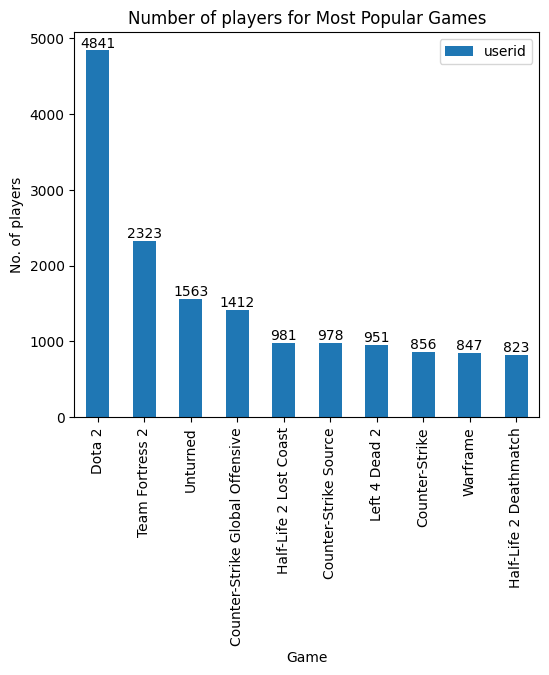

In [11]:
ax = gamer_count.plot(kind='bar', title='Number of players for Most Popular Games', ylabel='No. of players',
         xlabel='Game', figsize=(6, 5))

ax.bar_label(ax.containers[0])

### Check TOP-10 most played game in terms of hours

In [12]:
gameplay_hrs =df.groupby(['game'])[['hoursplayed']].sum().sort_values(by='hoursplayed',ascending=False).head(10)
gameplay_hrs

,hoursplayed
game,
Dota 2,986525.6
Counter-Strike Global Offensive,324183.6
Team Fortress 2,175996.3
Counter-Strike,135117.1
Sid Meier's Civilization V,100417.3
Counter-Strike Source,97053.5
The Elder Scrolls V Skyrim,71606.3
Garry's Mod,50456.3
Call of Duty Modern Warfare 2 - Multiplayer,42352.9


[Text(0, 0, '986526'),
 Text(0, 0, '324184'),
 Text(0, 0, '175996'),
 Text(0, 0, '135117'),
 Text(0, 0, '100417'),
 Text(0, 0, '97053.5'),
 Text(0, 0, '71606.3'),
 Text(0, 0, '50456.3'),
 Text(0, 0, '42352.9'),
 Text(0, 0, '34547.7')]

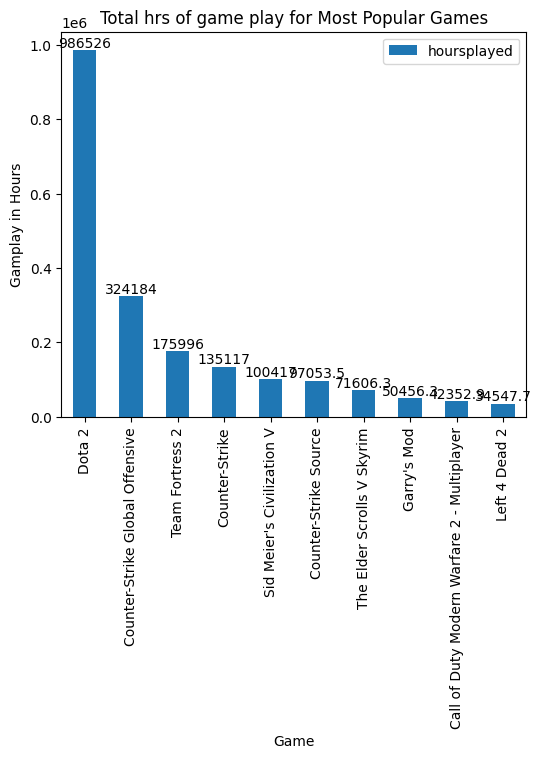

In [13]:
ax = gameplay_hrs.plot(kind='bar', title='Total hrs of game play for Most Popular Games', ylabel='Gamplay in Hours',
         xlabel='Game', figsize=(6, 5))

ax.bar_label(ax.containers[0])

### Top-10 average play-time For game

In [14]:
avg_gameplay_hrs = df.groupby(['game'])[['hoursplayed']].mean().sort_values(by='hoursplayed',ascending=False).head(10)
avg_gameplay_hrs

,hoursplayed
game,
Eastside Hockey Manager,648.000000
FIFA Manager 09,206.000000
Perpetuum,200.987500
Football Manager 2012,194.501887
Football Manager 2014,194.017722
Football Manager 2010,180.338356
Football Manager 2011,174.935385
Out of the Park Baseball 16,165.700000
Baldur's Gate II Enhanced Edition,165.165385


[Text(0, 0, '648'),
 Text(0, 0, '206'),
 Text(0, 0, '200.988'),
 Text(0, 0, '194.502'),
 Text(0, 0, '194.018'),
 Text(0, 0, '180.338'),
 Text(0, 0, '174.935'),
 Text(0, 0, '165.7'),
 Text(0, 0, '165.165'),
 Text(0, 0, '156.167')]

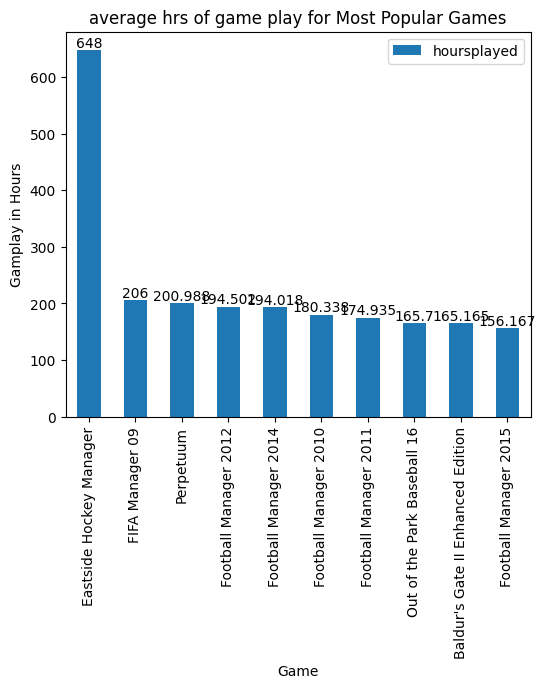

In [15]:
ax = avg_gameplay_hrs.plot(kind='bar', title='average hrs of game play for Most Popular Games', ylabel='Gamplay in Hours',
         xlabel='Game', figsize=(6, 5))

ax.bar_label(ax.containers[0])

 In terms of average gameplay hours, most of the games are related to sports management simulation games.

## User interaction based on gameplay hours.

In [16]:
df['likes'] = [1 if x > 48 else 0 for x in df['hoursplayed']]

In [17]:
df.head()

,userid,game,behavior,hoursplayed,likes
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,1
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,1
4,151603712,Spore,purchase,1.0,0


In [18]:
game_likes = df.groupby('game')[['likes']].apply(lambda x: (x==1).sum()).sort_values(by='likes', ascending=False)
game_likes.head(10)

,likes
game,
Dota 2,1346
Counter-Strike Global Offensive,739
Team Fortress 2,443
The Elder Scrolls V Skyrim,331
Sid Meier's Civilization V,240
Counter-Strike Source,227
Garry's Mod,197
Counter-Strike,183
Terraria,173


In [19]:

gp_gl= pd.merge(gameplay_hrs , game_likes, on='game')
gp_gl

,hoursplayed,likes
game,,
Dota 2,986525.6,1346
Counter-Strike Global Offensive,324183.6,739
Team Fortress 2,175996.3,443
Counter-Strike,135117.1,183
Sid Meier's Civilization V,100417.3,240
Counter-Strike Source,97053.5,227
The Elder Scrolls V Skyrim,71606.3,331
Garry's Mod,50456.3,197
Call of Duty Modern Warfare 2 - Multiplayer,42352.9,155


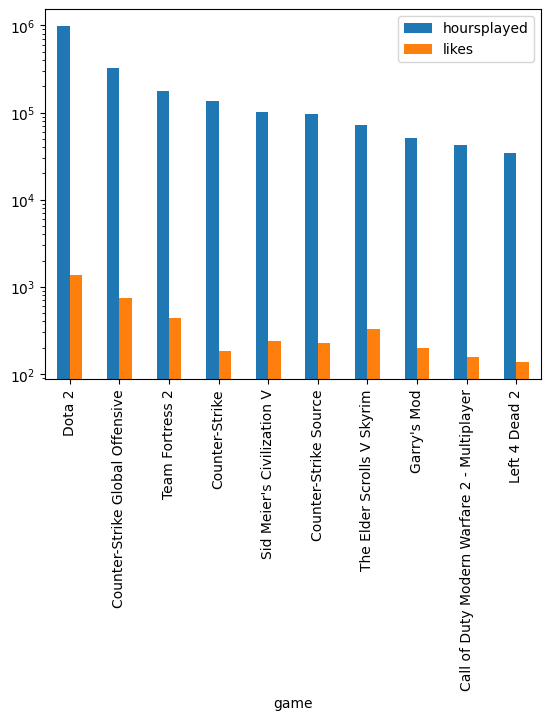

In [20]:
#Plot grouped bar-chart of common games

plot_gameplay_gamelikes = gp_gl.plot.bar(logy=True)

In [21]:
#Plot grouped bar-chart of common games
gc_gl= pd.merge(gamer_count , game_likes, on='game')
gc_gl

,userid,likes
game,,
Dota 2,4841,1346
Team Fortress 2,2323,443
Unturned,1563,68
Counter-Strike Global Offensive,1412,739
Half-Life 2 Lost Coast,981,0
Counter-Strike Source,978,227
Left 4 Dead 2,951,137
Counter-Strike,856,183
Warframe,847,83


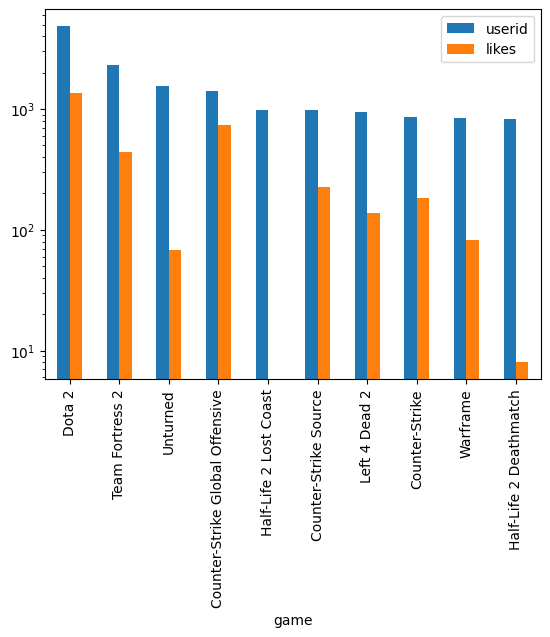

In [22]:
plot_gamercount_gamelikes = gc_gl.plot.bar(logy=True)